# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daffa Suada
- Email: suadaadaffa@gmail.com
- Id Dicoding: daffa_suada_i9ug

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from joblib import dump, load

### Menyiapkan data yang akan diguankan

In [3]:
employee_df = pd.read_csv(
    "employee_data.csv"
)
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
pd.set_option('display.max_columns', None)

employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preparation / Preprocessing

### Data Cleansing

In [6]:
employee_df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Terdapat 412 data yang kosong, untuk saat ini saya mencoba menghilangkannya. Karena ini informasi penting yang tidak kita ketahui. Walaupun itu menghilangkan lebih dari 20% datanya.

In [7]:
employee_df = employee_df.dropna()

In [8]:
employee_df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


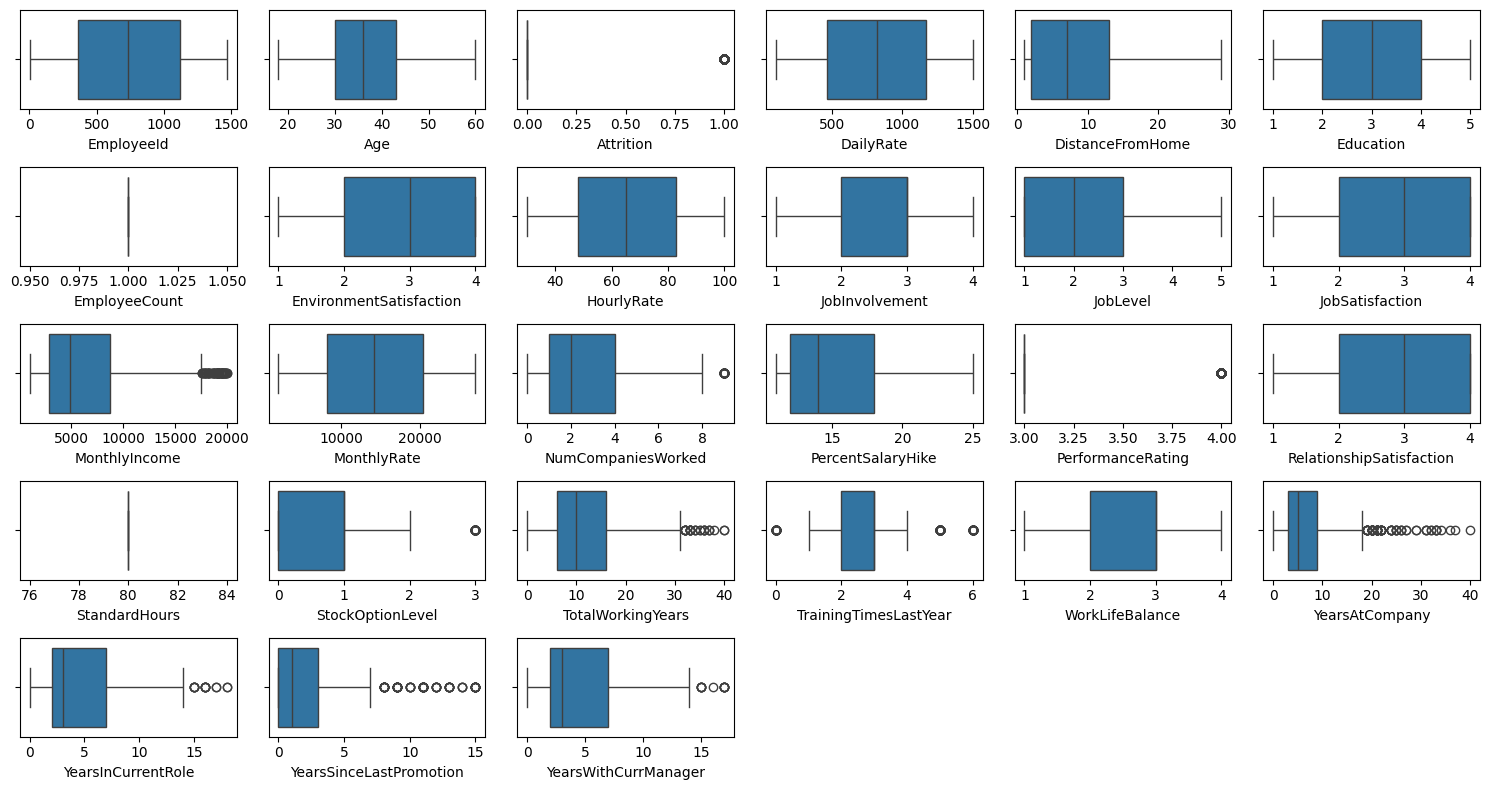

In [9]:
df_numeric = employee_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 8))

num_rows = 5
num_cols = 6

for i, column in enumerate (df_numeric, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_numeric, x=df_numeric[column])
    plt.tight_layout()

In [10]:
employee_df.to_csv('cleaned_employee_data.csv', index=False)

### Eksploratory Data Analysis

           EmployeeId
Attrition            
0.0               879
1.0               179


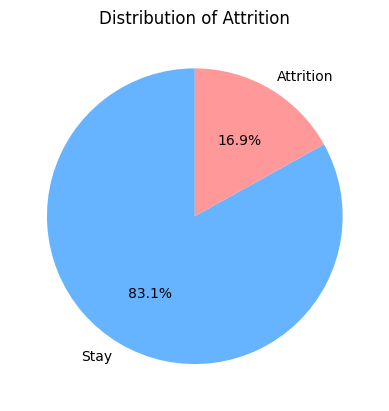

In [11]:
# Data Attrion vs Stay
employee_attrition = employee_df.groupby('Attrition').agg({"EmployeeId" : "count"})
print(employee_attrition)

values = employee_attrition['EmployeeId']
labels = employee_attrition.index.map({0: 'Stay', 1: 'Attrition'})

# Buat pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Attrition')
plt.show()

               Department  Attrition  EmployeeId
0         Human Resources        0.0          32
1         Human Resources        1.0           6
2  Research & Development        0.0         594
3  Research & Development        1.0         107
4                   Sales        0.0         253
5                   Sales        1.0          66


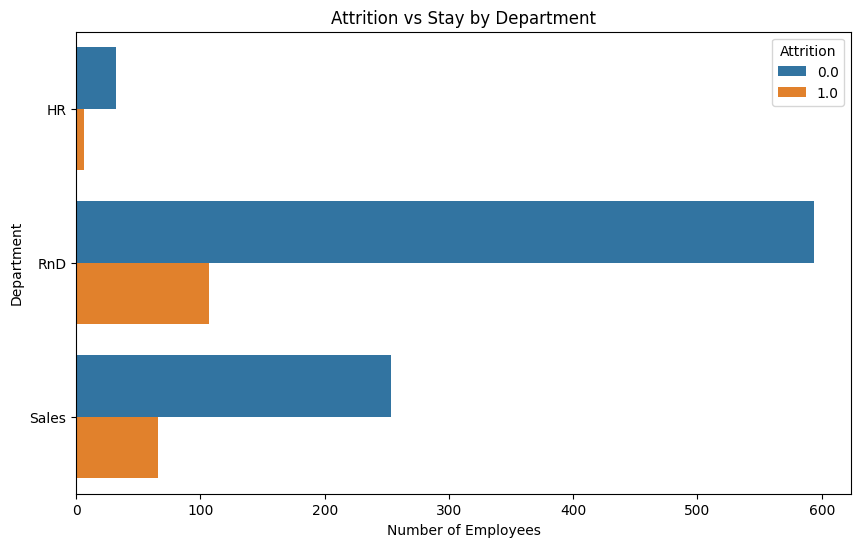

In [12]:
# Attrion by Departement
employee_departmen = employee_df.groupby(["Department", "Attrition"]).agg({"EmployeeId" : "count"}).reset_index()
print(employee_departmen)

employee_departmen['Department'] = employee_departmen['Department'].replace({
    'Human Resources': 'HR',
    'Research & Development': 'RnD',
    'Sales': 'Sales'  # Sales tetap
})

plt.figure(figsize=(10,6))
sns.barplot(data=employee_departmen, x='EmployeeId', y='Department', hue='Attrition')
plt.title('Attrition vs Stay by Department')
plt.ylabel('Department')
plt.xlabel('Number of Employees')
plt.show()

   Attrition  EnvironmentSatisfaction  JobSatisfaction  \
0        0.0                 2.778157         2.795222   
1        1.0                 2.391061         2.525140   

   RelationshipSatisfaction  
0                  2.753129  
1                  2.597765  


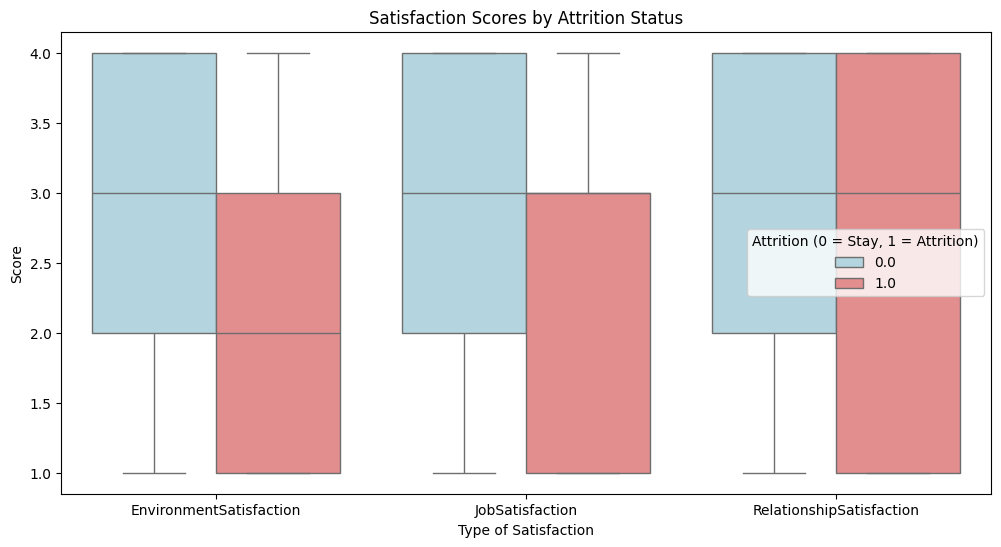

In [13]:
# Satisfaction Scores by Attrition Status
employee_satisfaction = employee_df.groupby(["Attrition"]).agg({"EnvironmentSatisfaction" : "mean", "JobSatisfaction" : "mean", "RelationshipSatisfaction": "mean"}).reset_index()
print(employee_satisfaction)

satisfaction_melted = employee_df.melt(id_vars='Attrition',
                                       value_vars=['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'],
                                       var_name='SatisfactionType',
                                       value_name='Score')

plt.figure(figsize=(12,6))
sns.boxplot(data=satisfaction_melted,
            x='SatisfactionType',
            y='Score',
            hue='Attrition',
            palette={0: 'lightblue', 1: 'lightcoral'})

plt.title('Satisfaction Scores by Attrition Status')
plt.ylabel('Score')
plt.xlabel('Type of Satisfaction')
plt.legend(title='Attrition (0 = Stay, 1 = Attrition)')
plt.show()

   Attrition OverTime  EmployeeId
0        0.0       No         670
1        0.0      Yes         209
2        1.0       No          81
3        1.0      Yes          98


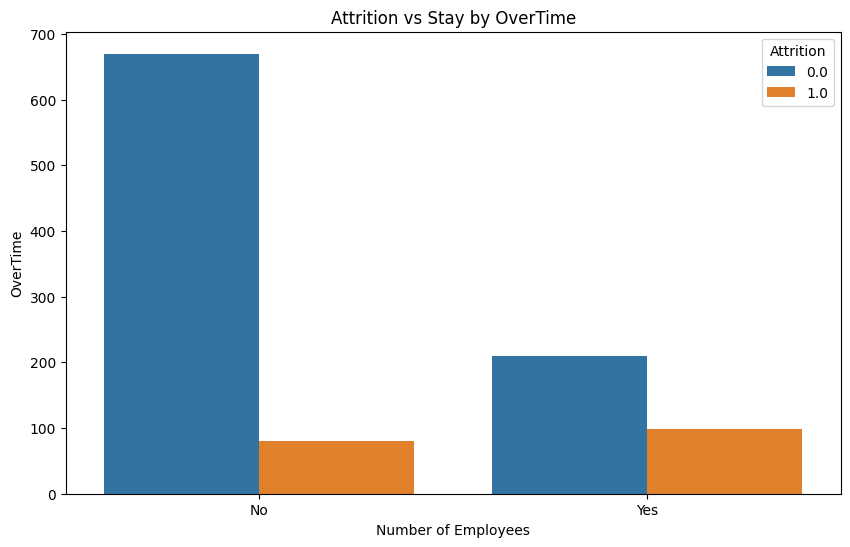

In [14]:
# Attrion by Overtime
employee_overtime = employee_df.groupby(["Attrition", "OverTime"]).agg({"EmployeeId" : "count"}).reset_index()
print(employee_overtime)

plt.figure(figsize=(10,6))
sns.barplot(data=employee_overtime, x='OverTime', y='EmployeeId', hue='Attrition')
plt.title('Attrition vs Stay by OverTime')
plt.ylabel('OverTime')
plt.xlabel('Number of Employees')
plt.show()

               EmployeeId
Age Attrition            
18  0.0                 3
    1.0                 3
19  0.0                 3
    1.0                 6
20  0.0                 3
...                   ...
57  0.0                 4
58  0.0                 6
    1.0                 5
59  0.0                10
60  0.0                 4

[81 rows x 1 columns]


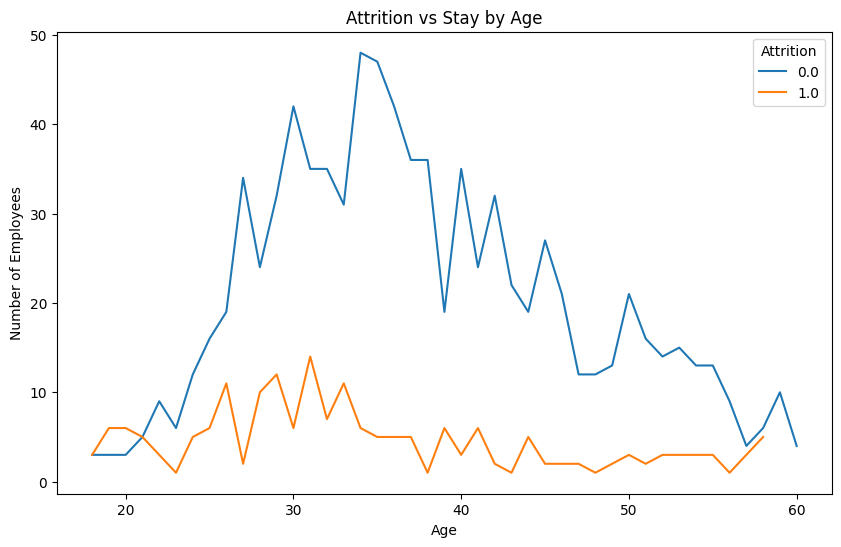

In [15]:
# Attrion by Age
attrition_age = employee_df.groupby(['Age', 'Attrition']).agg({"EmployeeId" : "count"})
print(attrition_age)

plt.figure(figsize=(10,6))
sns.lineplot(data=attrition_age, x='Age', y='EmployeeId', hue='Attrition')
plt.title('Attrition vs Stay by Age')
plt.ylabel('Number of Employees')
plt.xlabel('Age')
plt.show()

           MonthlyIncome
Attrition               
0.0                  879
1.0                  179


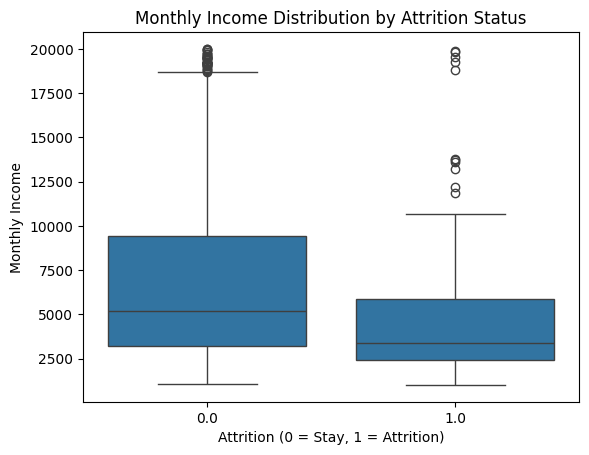

In [16]:
# Attrition by Income
employee_monthlyIncome = employee_df.groupby(["Attrition"]).agg({"MonthlyIncome" : "count"})
print(employee_monthlyIncome)

sns.boxplot(data=employee_df,
            x='Attrition',
            y='MonthlyIncome',
            )

plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition (0 = Stay, 1 = Attrition)')
plt.ylabel('Monthly Income')
plt.show()

### Encoding

In [17]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

df_cat = employee_df.select_dtypes(include="object")
cat_col = df_cat.columns

# Encode kolom kategorikal
for column in cat_col:
    employee_df[column] = label_encoder.fit_transform(employee_df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
employee_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,2,1141,1,11,2,3,1,1,0,61,1,2,0,2,1,4777,14382,5,0,0,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,1,1,34,3,1,6,3,1,2461,10332,9,0,1,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,3,0,77,3,4,7,2,1,13525,14864,5,0,0,14,3,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,2,1124,2,1,2,3,1,2,1,57,1,2,7,4,1,7457,13273,2,0,1,22,4,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,2,725,1,2,3,3,1,4,1,78,3,5,3,1,1,19859,21199,5,0,1,13,3,4,80,1,24,2,3,5,2,1,4


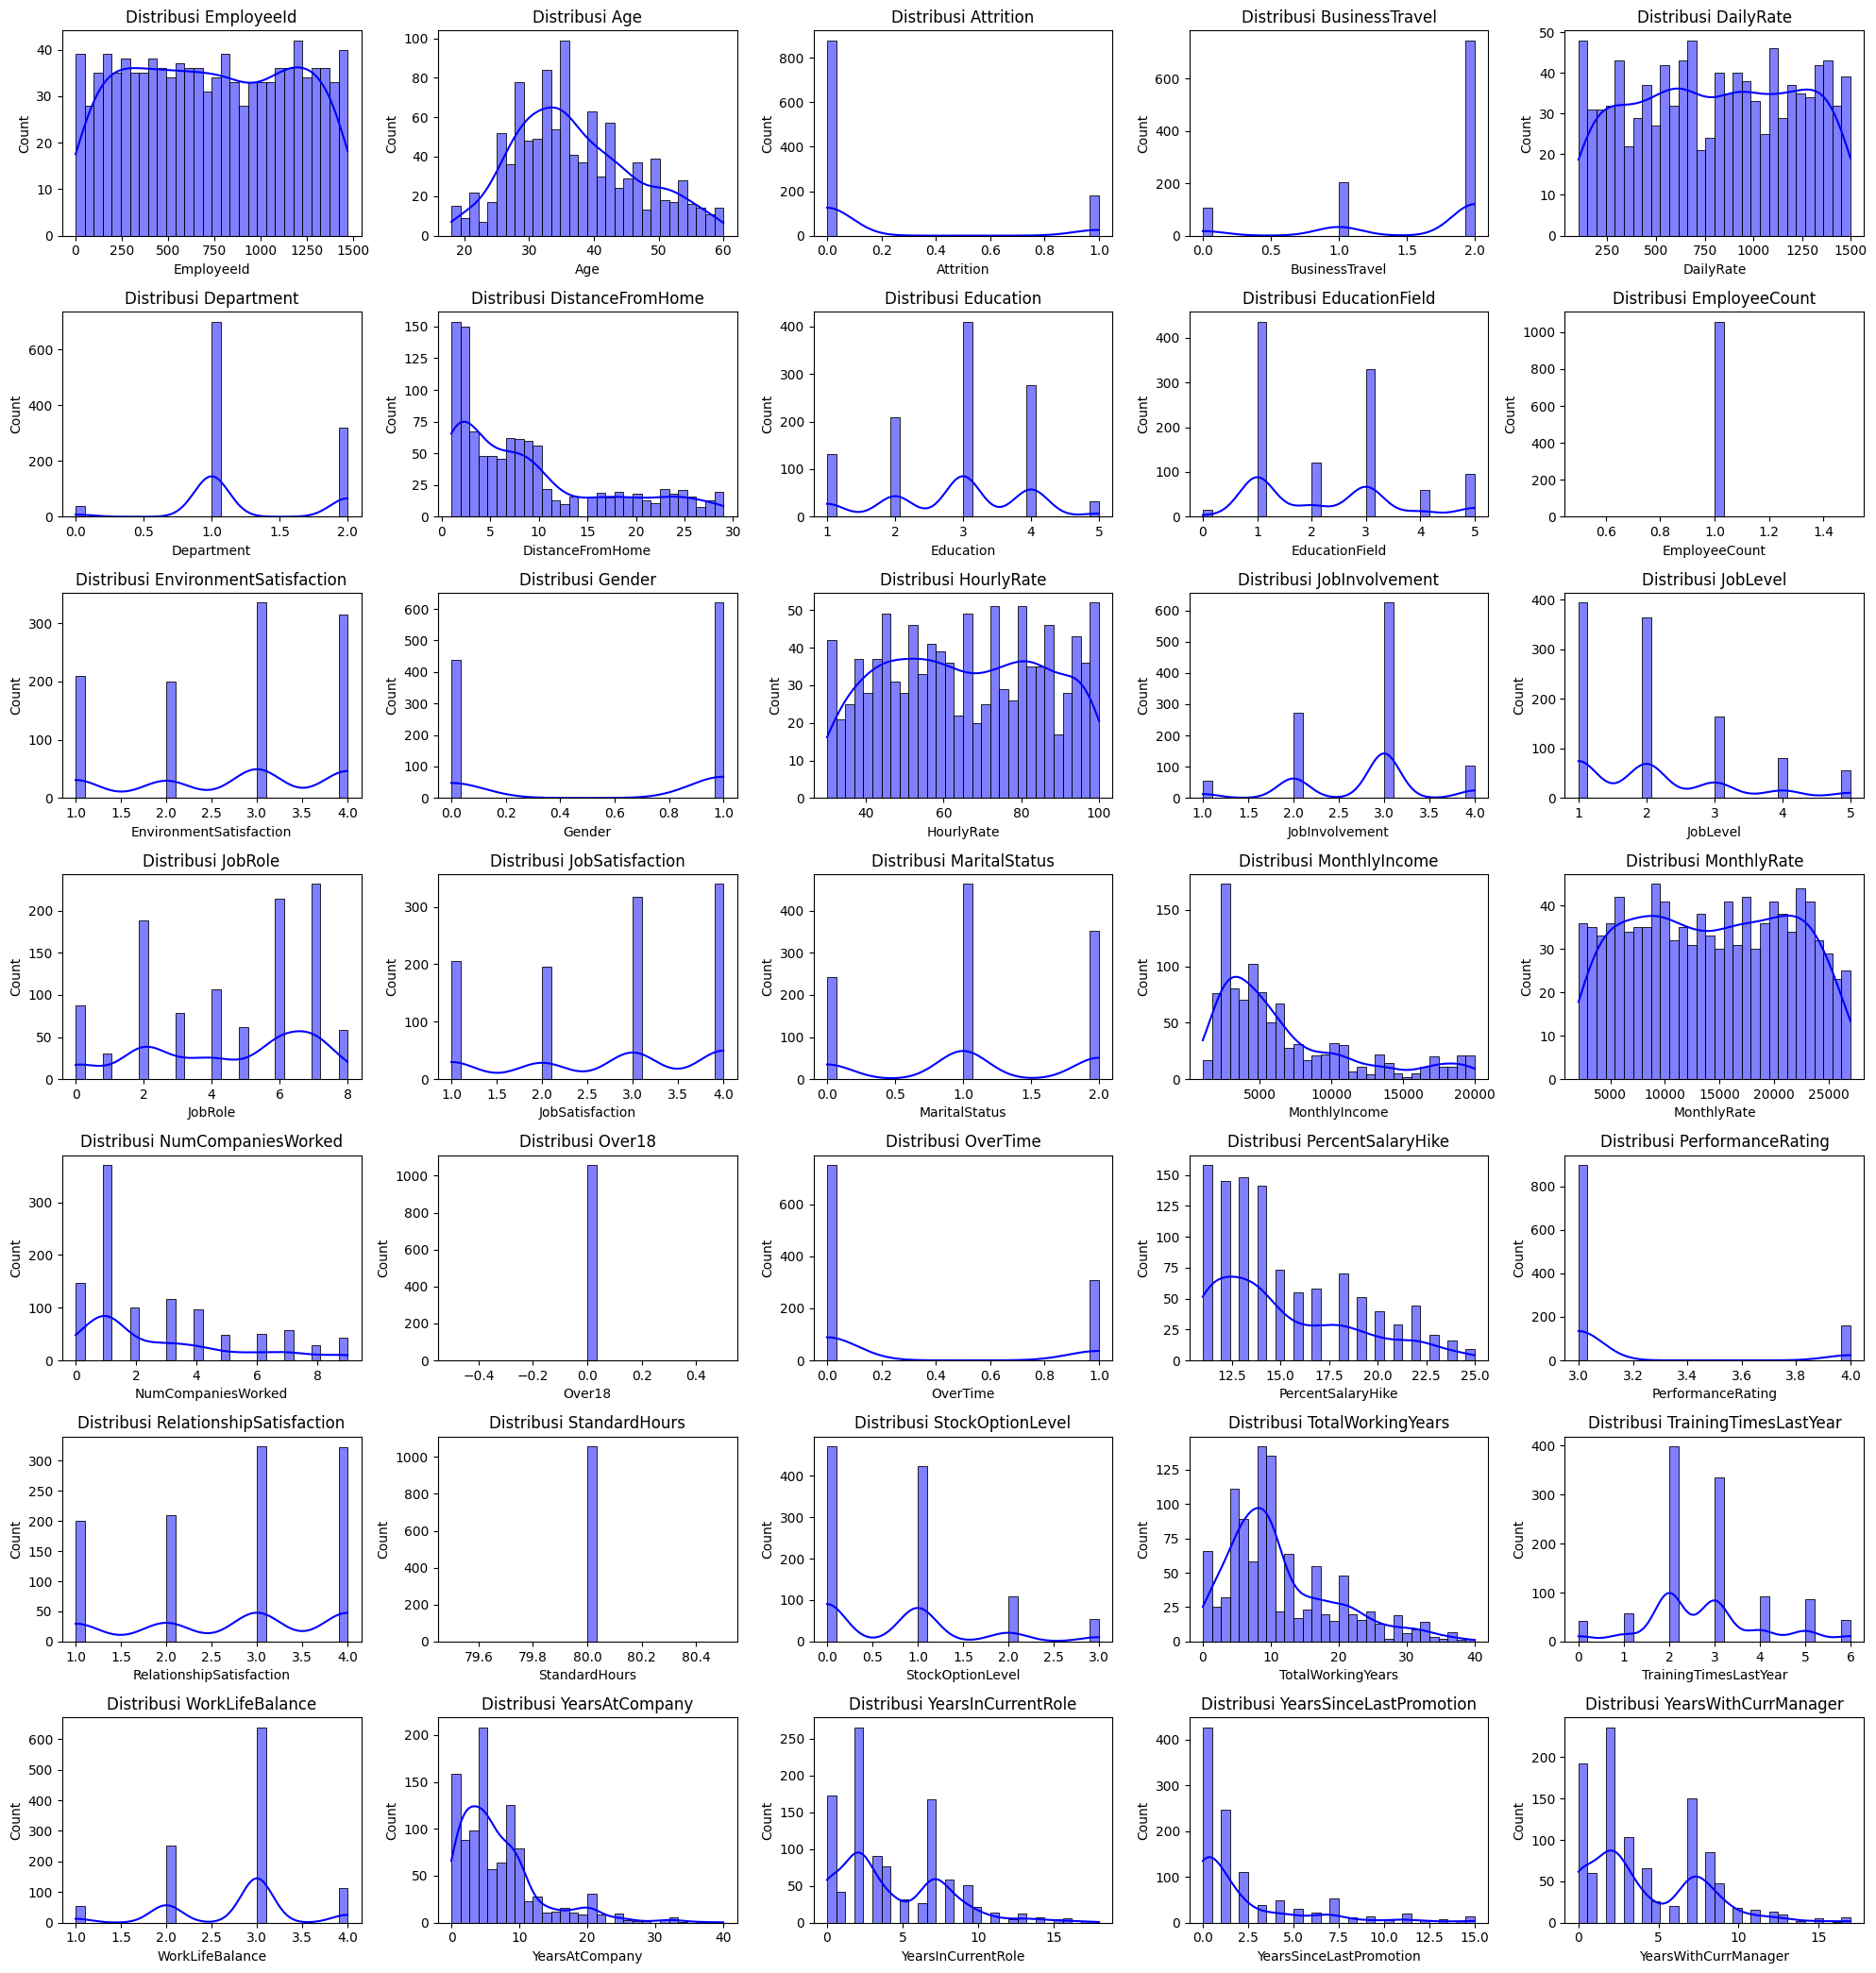

In [18]:
import math

num_features = employee_df.select_dtypes(include=[np.number])
n_features = len(num_features.columns)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(employee_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

In [19]:
employee_df['Gender'].value_counts()

,count
Gender,
1,620
0,438


### Spliting Data

In [20]:
# Memisahkan fitur (X) dan target (y)
X = employee_df.drop(columns=['EmployeeId','Attrition'])
y = employee_df['Attrition']

In [21]:
from sklearn.model_selection import train_test_split

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(846, 33), y_train=(846,)
Test set shape: X_test=(212, 33), y_test=(212,)


## Modeling

In [22]:
# Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

print("Model training selesai.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training selesai.


## Evaluation

In [23]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Logistic Regresion': evaluate_model(lr, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0            Logistic Regresion  0.830189   0.825230  0.102564  0.181818
1            Decision Tree (DT)  0.787736   0.749790  0.205128  0.262295
2            Random Forest (RF)  0.844340   0.869276  0.153846  0.266667
3  Support Vector Machine (SVM)  0.504717   0.766330  0.743590  0.355828


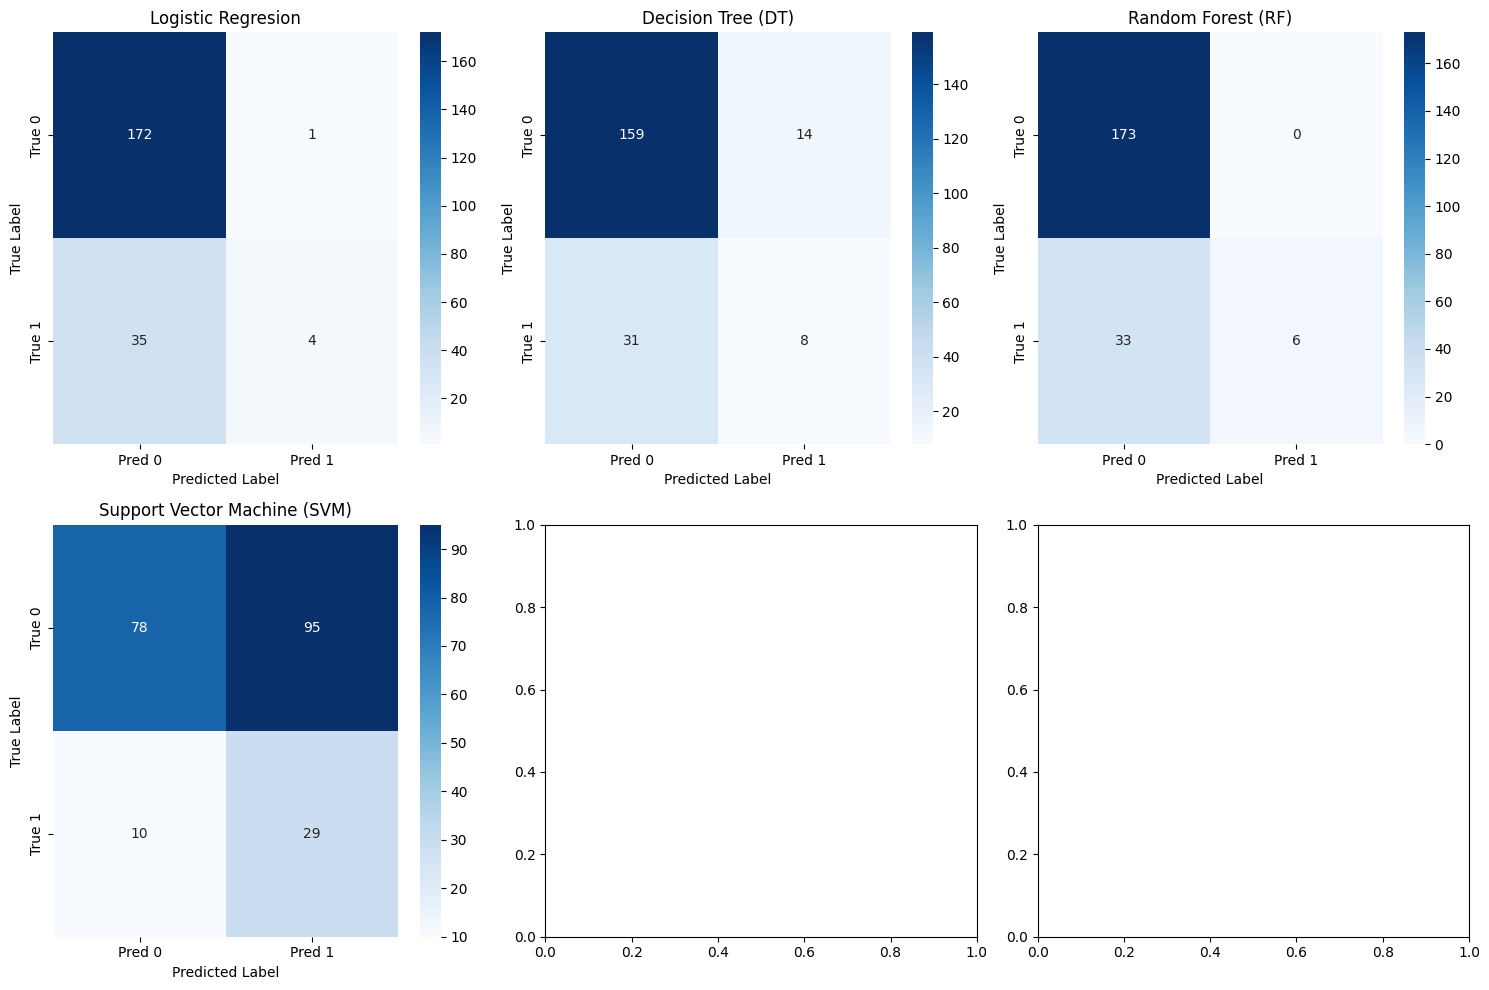

In [24]:
# Menampilkan confusion matrix untuk setiap model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Buat grid untuk menampilkan beberapa confusion matrix
axes = axes.ravel()  # Flatten agar lebih mudah diakses dengan loop

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()

## Deployment

In [25]:
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

# Prediksi Sederhana

In [35]:
testing = {
    'Age': [37],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [1141],
    'Department': ['Research & Development'],
    'DistanceFromHome': [11],
    'Education': [2],
    'EducationField': ['Medical'],
    'EmployeeCount': [1],
    'EnvironmentSatisfaction': [1],
    'Gender': ['Female'],
    'HourlyRate': [61],
    'JobInvolvement': [1],
    'JobLevel': [2],
    'JobRole': ['Healthcare Representative'],
    'JobSatisfaction': [2],
    'MaritalStatus': ['Married'],
    'MonthlyIncome': [71777],
    'MonthlyRate': [14382],
    'NumCompaniesWorked': [5],
    'Over18': ['Y'],
    'OverTime': ['No'],
    'PercentSalaryHike': [15],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [1],
    'StandardHours': [80],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [15],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [1],
    'YearsAtCompany': [7],
    'YearsInCurrentRole': [0],
    'YearsSinceLastPromotion': [0],
    'YearsWithCurrManager': [0],
}

sample_df = pd.DataFrame(testing)

cat_cols = sample_df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    sample_df[col] = le.fit_transform(sample_df[col])

# Prediksi menggunakan model yang telah dilatih
prediction = rf.predict(sample_df)

# Output hasil prediksi
print("Prediksi Attrition:", "Keluar" if prediction[0] == 1 else "Bertahan")


Prediksi Attrition: Bertahan
